In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
4

from sklearn.pipeline import make_pipeline


In [2]:
df = pd.read_csv("train.csv", encoding='latin1')
df_test = pd.read_csv("test.csv", encoding='latin1')

In [3]:
df.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [4]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [5]:
df.shape

(27481, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [60]:
df.describe()

,sentiment,Age of User,Population -2020,Land Area (Km²),Density (P/Km²),text_length
count,27480.000000,27480.000000,2.748000e+04,2.748000e+04,27480.000000,27480.000000
mean,1.029148,2.499927,4.018634e+07,6.621672e+05,357.699491,68.354949
std,0.771118,1.707920,1.504972e+08,1.807457e+06,2013.786207,35.624417
min,0.000000,0.000000,8.010000e+02,0.000000e+00,2.000000,3.000000
25%,0.000000,1.000000,1.968001e+06,2.281000e+04,35.000000,39.000000
50%,1.000000,2.500000,8.655535e+06,1.118900e+05,89.000000,64.000000
75%,2.000000,4.000000,2.843594e+07,5.279700e+05,214.000000,97.000000
max,2.000000,5.000000,1.439324e+09,1.637687e+07,26337.000000,159.000000


In [ ]:
df = df.dropna(subset=['text', 'selected_text', 'sentiment'])
df.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
text_length         0
dtype: int64

C:\Users\hansr\AppData\Local\Temp\ipykernel_37632\2766312026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette=['#3e3b3d', '#f15c5c', '#74a9d8'])


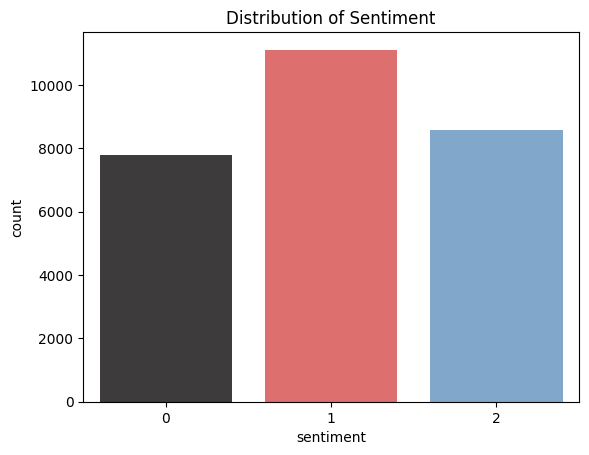

In [ ]:
sns.countplot(data=df, x='sentiment', palette=['#3e3b3d', '#f15c5c', '#74a9d8'])
plt.title("Distribution of Sentiment")
plt.show()


C:\Users\hansr\AppData\Local\Temp\ipykernel_37632\3704880149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")


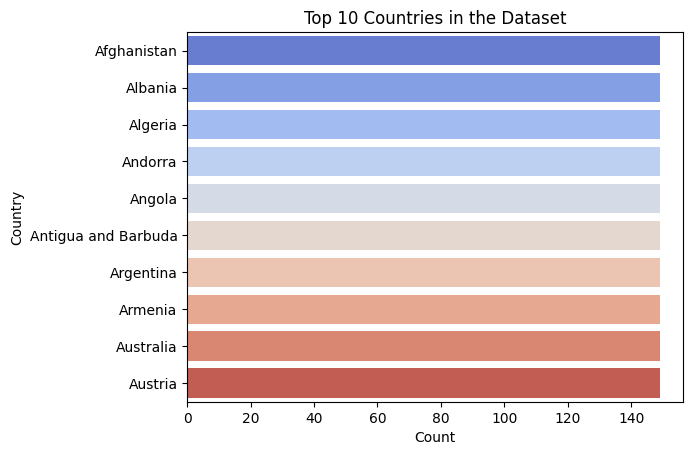

In [13]:
top_countries = df['Country'].value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries in the Dataset")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


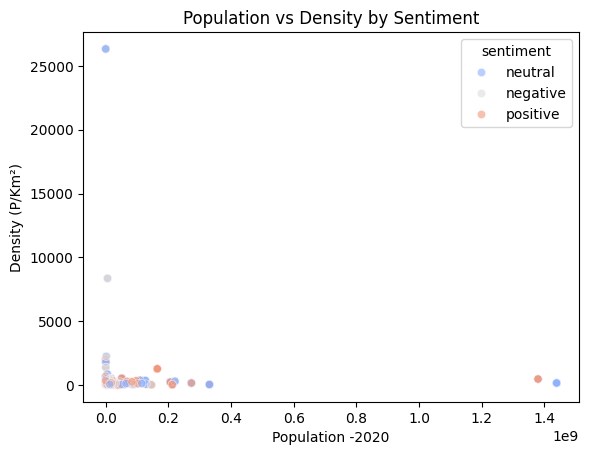

In [19]:
sns.scatterplot(data=df, x='Population -2020', y='Density (P/Km²)', hue='sentiment', alpha=0.6, palette="coolwarm")
plt.title("Population vs Density by Sentiment")
plt.show()


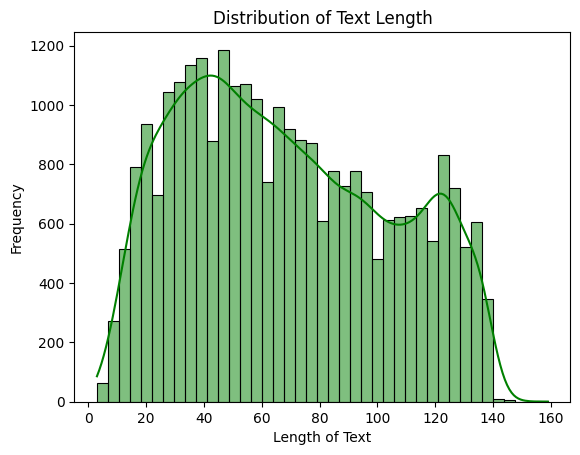

In [22]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

sns.histplot(df['text_length'], kde=True, color='green')
plt.title("Distribution of Text Length")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()

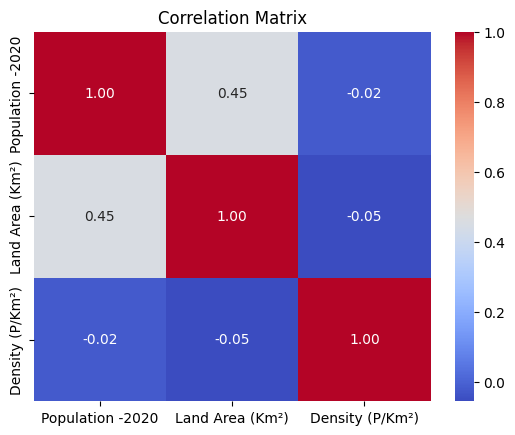

In [24]:
corr_matrix = df[['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [36]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df['Age of User'] = label_encoder.fit_transform(df['Age of User'].astype(str))

In [37]:
vectorizer = TfidfVectorizer(stop_words='english')

In [38]:
X = df[['text', 'selected_text', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']]
X['text_selected'] = df['text'] + ' ' + df['selected_text']

C:\Users\hansr\AppData\Local\Temp\ipykernel_37632\2853450491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text_selected'] = df['text'] + ' ' + df['selected_text']


In [ ]:
X = pd.get_dummies(X, columns=['Country'], drop_first=True)
y = df['sentiment']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
clf = make_pipeline(TfidfVectorizer(stop_words='english'), RandomForestClassifier(n_estimators=100, random_state=42))

In [45]:
clf.fit(X_train['text_selected'], y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [46]:
y_pred = clf.predict(X_test['text_selected'])

In [47]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7359898107714702
              precision    recall  f1-score   support

           0       0.79      0.59      0.68      1572
           1       0.67      0.82      0.73      2236
           2       0.81      0.76      0.79      1688

    accuracy                           0.74      5496
   macro avg       0.76      0.72      0.73      5496
weighted avg       0.75      0.74      0.73      5496



In [ ]:
model = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression(max_iter=1000))
model.fit(X_train['text_selected'], y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69      1572
           1       0.68      0.80      0.73      2236
           2       0.81      0.77      0.79      1688

    accuracy                           0.74      5496
   macro avg       0.76      0.73      0.74      5496
weighted avg       0.75      0.74      0.74      5496

Confusion Matrix:
 [[ 977  513   82]
 [ 233 1789  214]
 [  48  338 1302]]
